# <b><u> Project Title : Sentiment Analysis of COVID-19 tweets</u></b>

Data Source https://www.kaggle.com/code/bansodesandeep/nlp-predicting-sentiment-of-covid-19-tweets/input

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer # convert the words into root forms
from sklearn.feature_extraction.text import TfidfVectorizer # sklearn.feature_extraction.text module provides methods to convert text data into numerical features
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


use of the naive bayes
Text Classification: Naive Bayes is widely used for text classification tasks such as spam detection, sentiment analysis, topic categorization, and document classification. It's effective in handling high-dimensional data, like text, where each feature represents the presence or absence of a word or term.

Spam Detection: In email systems, Naive Bayes is used to classify emails as either spam or non-spam (ham). It examines the words and features in an email to determine the likelihood that it's spam based on a training dataset of labeled examples.

Sentiment Analysis: Naive Bayes can be employed to analyze the sentiment of text data, such as social media posts, product reviews, or customer feedback. It categorizes text as positive, negative, or neutral based on the words and phrases used.

Document Categorization: In information retrieval and content management systems, Naive Bayes can categorize documents into predefined categories or topics. For example, news articles can be categorized into sections like politics, sports, or entertainment.

Recommendation Systems: Naive Bayes can be used as part of a recommendation system to suggest items

In [7]:
! pip install kaggle                #Importing kaggle library to colab python

! mkdir ~/.kaggle                   #Make a kaggle directory in Colab

! cp kaggle.json ~/.kaggle/         #Copy the uploaded kaggle.json to this kaggle directory in colab

! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets download -d  kazanova/sentiment140

sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
! unzip /content/sentiment140.zip

Archive:  /content/sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


Loading Dataset

In [11]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',sep=',',encoding='latin')

In [14]:

df.columns=['target','ids','date','flag','user','text']
df.head()

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [15]:
df.describe()

,target,ids
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [19]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

Only Location column has Null values.

# **EDA**

Lets find out unique values in each column.

In [17]:
a=[]
b=[]
for col in df.columns:
  a.append(df[col].nunique())
  b.append(col)


In [23]:
df[col].nunique() #count the number of unique values

1581465

In [20]:
a

[2, 1598314, 774362, 1, 659775, 1581465]

In [21]:
b

['target', 'ids', 'date', 'flag', 'user', 'text']

In [18]:
d = pd.DataFrame(a,b,columns=['counts'])


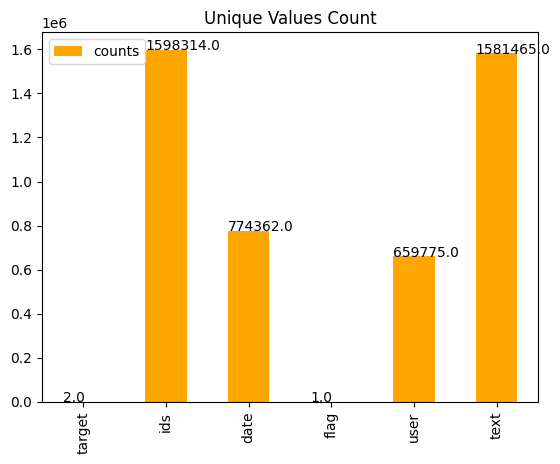

In [22]:
n=d.plot(kind='bar',color='orange')
plt.title("Unique Values Count")
for p in n.patches:
  n.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

In data there are 12220 different locations and 30 unique values in TweetAt column means given dataset is of 30 days.

In [24]:
# lets count Null Values
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer

in Location column 8590 null values.

In [34]:
# Sentiment count
df.target.value_counts()

4    800000
0    799999
Name: target, dtype: int64

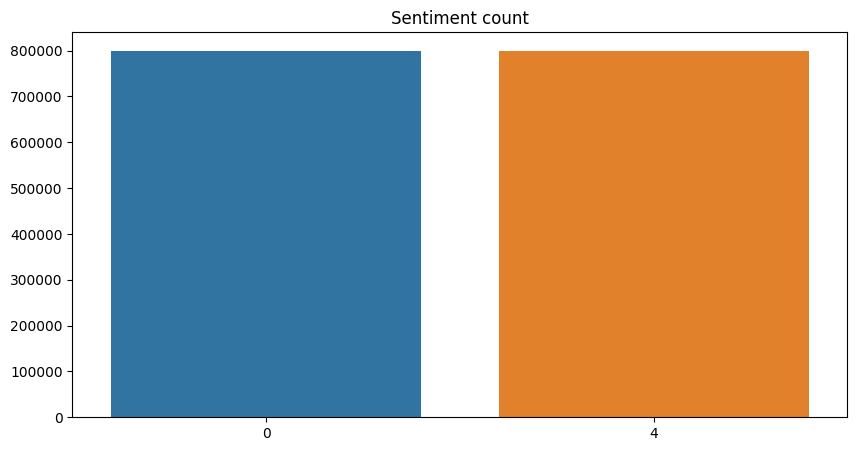

In [35]:
sentiment_counts = df['target'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment count")
plt.show()


There are five sentiment types Neutral,Positive,Extremely positive,Negative,Extremely Negative. in that count of Positive tweet is highest.

lets go through each type of sentiment:

In [41]:
df[df['target']==4]

,target,ids,date,flag,user,text
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [42]:
df[df['target']==0]

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
799994,0,2329205009,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,dandykim,Sick Spending my day laying in bed listening ...
799995,0,2329205038,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,bigenya,Gmail is down?
799996,0,2329205473,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,LeeLHoke,rest in peace Farrah! So sad
799997,0,2329205574,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,davidlmulder,@Eric_Urbane Sounds like a rival is flagging y...


From above tweets we can see that there is no difference in Positive and Extremely Positive tweets or Negative and Extremely Negative Tweets.so we can combine them together as..

positive = extremely positive + positive
negative = extremely negative + negative

and then..
catagories them as 1 for positive,2 for neutral, 3 for negative.

In [43]:
df['Sentiment_cat'] = df['target'].replace({4:1,0:0})

In [49]:
df.sample()

,target,ids,date,flag,user,text,Sentiment_cat
177939,0,1965837993,Fri May 29 16:38:08 PDT 2009,NO_QUERY,amandakihara,i hate stupid boys! arrgh,0


In [50]:
df.Sentiment_cat.unique()

array([0, 1])

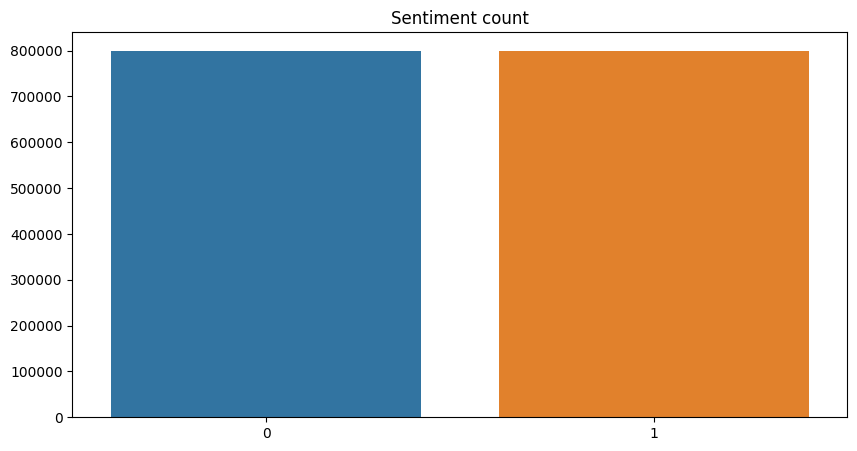

In [51]:
Sentiment_cat = df['Sentiment_cat'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=Sentiment_cat.index, y=Sentiment_cat.values)
plt.title("Sentiment count")
plt.show()

we have given tweets of 1 month..

In [54]:
df.date.value_counts()

Mon Jun 15 12:53:14 PDT 2009    20
Fri May 29 13:40:04 PDT 2009    17
Mon Jun 15 13:39:50 PDT 2009    17
Fri May 22 05:10:17 PDT 2009    17
Fri Jun 05 11:05:33 PDT 2009    16
                                ..
Sun Jun 07 12:36:09 PDT 2009     1
Sun Jun 07 12:36:07 PDT 2009     1
Sun Jun 07 12:36:04 PDT 2009     1
Sun Jun 07 12:36:03 PDT 2009     1
Tue Jun 16 08:40:50 PDT 2009     1
Name: date, Length: 774362, dtype: int64

In [56]:
df['date']=df['date'].astype(str)

In [62]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y-hh',errors='ignore')

In [65]:
df['date'] = df['date'].astype(str)

In [68]:
TweetAt_counts = df['date'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=TweetAt_counts.index, y=TweetAt_counts.values)
plt.xticks(rotation = 90)
plt.title("Tweets per day")
plt.ylabel("Count")
plt.xlabel("TweetAt")
plt.show()


KeyboardInterrupt: ignored

<Figure size 1000x500 with 0 Axes>

most of the tweets are from month March.

In [ ]:
df.taget.unique()

In [ ]:
plt.figure(figsize=(25, 10))
sns.countplot(x=df['TweetAt'], hue=df['Sentiment'])
plt.title('Tweets per day')
plt.xticks(rotation=90)
plt.show()

above plot shows sentiment wise count of tweets per day

In [ ]:
# Locations
df['Location'].value_counts()

In [ ]:
# lets find out top 10 locations
top_loc_df = pd.DataFrame(df.Location.value_counts().head(10))

In [ ]:
top_loc_df.reset_index(inplace=True)

top_loc_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)


In [ ]:
top_loc_df

Maximum tweets are from London

In [ ]:
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0,0.1,0.0,0.2,0.1)

# Creating color parameters
colors = ( "orange", "cyan", "brown",
        "grey", "indigo", "beige", "tomato","coral", "pink","violet")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(top_loc_df['Location_Count'],
                                autopct = lambda pct: func(pct, top_loc_df['Location_Count']),
                                explode = explode,
                                labels = top_loc_df['Location'],
                                shadow = True,
                                colors = colors,
                                startangle = 90,
                                wedgeprops = wp,
                                textprops = dict(color ="magenta"))

# Adding legend
ax.legend(wedges, top_loc_df['Location'],
        title ="Top 10 Locations",
        loc ="center left",
        bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Top 10 Locations")

# show plot
plt.show()


In [ ]:
sns.barplot(x="Location", y="Location_Count", data=top_loc_df,
                 palette='coolwarm')
# sns.set_theme(style="darkgrid")
plt.title("Top 10 location with No. tweets")
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (5,5)

above plot shows top 10 locations which has highest no. of tweets

country wise sentiment analysis

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['Location'] == 'India'], x='Sentiment')
plt.title('Sentiment count: India')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Location']=="London"], x = 'Sentiment')
plt.title('Sentiment count: London')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Location']=="United States"], x = 'Sentiment')
plt.title('Sentiment count: USA')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Location']=="China"], x = 'Sentiment')
plt.title('Sentiment count: China')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Location']=="Australia"], x = 'Sentiment')
plt.title('Sentiment count: Australia')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.columns

In [ ]:
df.loc[4117]

In [ ]:
df.head()

# **Data Processing and Cleaning**

# Removing User

In [ ]:
df['OriginalTweet'].iloc[4117]

In [ ]:
def rem_user(tweet):
  a=[]
  for word in tweet.lower().split():
    if word.startswith('@'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [ ]:
df['Tweets'] =df['OriginalTweet'].apply(rem_user)

In [ ]:
df['Tweets'].iloc[4117]

# Removing links

In [ ]:
def rem_links(tweet):
  a=[]
  for word in tweet.lower().split():
    if word.startswith('https:') or word.startswith('http:'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [ ]:
df['Tweets'] =df['Tweets'].apply(rem_links)

In [ ]:
df['Tweets'].iloc[4117]

# Removing digits and special characters

In [ ]:
import re
def rm_dig(tweet):
  a=[]
  for word in tweet.split():
    output = re.sub('[â£/0-9]+', '', word)
    a.append(output)
  return ' '.join(a)

In [ ]:
df['Tweets'] =df['Tweets'].apply(rm_dig)

In [ ]:
df['Tweets'].iloc[4117]

# Removing stopwords and Punctuations

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

In [ ]:
[punc for punc in string.punctuation]

In [ ]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df['Tweets'] = df['Tweets'].apply(text_process)

In [ ]:
df['Tweets'].iloc[4117]

# Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
     return " ".join([stemmer.stem(word) for word in text.split()])

df['Tweets']=df['Tweets'].apply(stem_words)


In [ ]:
df['Tweets'].iloc[4117]

# Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [ ]:
df['Tweets']=df['Tweets'].apply(lemmatize_words)

In [ ]:
df['Tweets'].iloc[4117]

In [ ]:
df['OriginalTweet'].iloc[4117]

# Analyzing Hashtags

In [ ]:
def get_tags(tweet):
  stri = ''
  for word in tweet.lower().split():
    if word.startswith("#"):
      stri+=word[1:]+','
  return stri[:-1]

In [ ]:
df['hashtags'] = df['OriginalTweet'].apply(get_tags)

In [ ]:
df["OriginalTweet"].iloc[25]

In [ ]:
df['Tweets'].iloc[25]

In [ ]:
df['hashtags'].iloc[25]

In [ ]:
all_Words = ' '.join([twts for twts in df['Tweets'][df['Sentiment_cat']==1]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
all_Words = ' '.join([twts for twts in df['Tweets'][df['Sentiment_cat']==2]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
all_Words = ' '.join([twts for twts in df['Tweets'][df['Sentiment_cat']==3]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.loc[2235]

In [ ]:
df['hashtags'].value_counts()

# **Model Training (for Multiclass Classification)**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train,test = train_test_split(df,test_size = 0.2,random_state=0,stratify = df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("test shape : ", test.shape)

# **Counter Vectorizer For Multi Class Classification**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweets.values)
X_test = vectorizer.transform(test.Tweets.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

In [ ]:
X_train.toarray()[1]

In [ ]:
y_train

In [ ]:
y_test

# **Naive Bayes Classifier for MULTICLASS Classification**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

y_pred = naiveByes_clf.predict(X_test)


In [ ]:
train_accuracy = naiveByes_clf.score(X_train,y_train)
print("training accuracy Score    : ",train_accuracy)

NB_accuracy = accuracy_score(y_test,y_pred)
print("test accuracy Score : ",NB_accuracy )


print(classification_report(y_pred,y_test))

# **Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

In [ ]:
sgd_prediction = sgd_clf.predict(X_test)

print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))

sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Validation accuracy Score : ",sgd_accuracy )

print(classification_report(sgd_prediction,y_test))

# **RANDOM FOREST CLASSIFIER (For Multiclass Classification)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)


In [ ]:
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

# **Support vector machine( For Multiclass Classification)**

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

# **Logistic Regression(For Multiclass Classification)**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

# **CATBOOST MODEL (For Multiclass Classification)**

In [ ]:
#!pip install catboost
#!pip install ipywidgets


In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,
        eval_set=(X_test, y_test),
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

In [ ]:
catboost_prediction = clf2.predict(X_test)
catboost_accuracy = accuracy_score(y_test,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_test))

# **Result of Multiclass Classification**

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy,
              rf_accuracy, NB_accuracy,
              sgd_accuracy,catboost_accuracy]})
models.reset_index(inplace=True)
models.sort_values(by='Test accuracy', ascending=False)

# **CONVRTING MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION**

In [ ]:
new_df = df[['Tweets','Sentiment']]

In [ ]:
new_df

In [ ]:
new_df=new_df[new_df['Sentiment']!="Neutral"]

In [ ]:
new_df['Sentiment'] = new_df['Sentiment'].replace({'Positive':1,'Extremely Positive':1,'Negative':0,'Extremely Negative':0})

In [ ]:
new_df

# **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("test shape : ", test.shape)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweets.values)
X_test = vectorizer.transform(test.Tweets.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

# **NAIVE BAYES CLASSIFIER FOR BINARY CLASSIFICATION.**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

# **RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

# **LOGISTIC REGRESSION(BINARY CLASSIFICATION)**

In [ ]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

# **CATBOOST ALGORITHM FOR BINARY CLASSIFICATION**

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,
        eval_set=(X_test, y_test),
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

In [ ]:
catboost_prediction = clf2.predict(X_test)
catboost_accuracy = accuracy_score(y_test,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_test))

# **SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)**

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

# **Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

In [ ]:
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_test)

In [ ]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **EVALUATION OF ALL BINARY CLASSIFICATION MODELS**

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent', 'CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy,
              rf_accuracy, NB_accuracy,
              sgd_accuracy, catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)


# **Conlusion**

* For multiclass classification, the best model for this dataset would be CatBoost which gives highest accuracy 62%.
*For binary classification, the best model for this dataset would be Logistic Regression which gives highest accuracy 87%.